Scott Otto

matplotlib homework (5)

Pyber (option 1)

Three observable trends:

Urban areas have more drivers and more rides/trips. As expected, Suburban and Rural areas, respectively, fall in line behind.

Urban areas typically have lower average fare prices.  This is also expected, as cites are dense with things to do, relative to where one resides or works, and therefore would provide for shorter trips.

Rural areas can have higher average fare prices, as there is a likely a greater distance traveled to go to a destination.  Even something as common as a grocery store could be a greater distance as they are placed based on population density.

Suburban areas have an interesting mix of number of rides and average fare price, as not only are potential destinations in the suburban area, but may also venture into the Urban areas due to their proximity.  

It is fairly easy to surmise that population density is directly correlated to not only the number of drivers, average fare and number of trips, but also to the number of drivers and/or passengers willing to participate in the use of this service.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load and read
city_data = pd.read_csv ("data/city_data.csv")
ride_data = pd.read_csv ("data/ride_data.csv")

# Combine the data into a single dataset
combined_scuber_df = pd.merge(ride_data, city_data, on = "city")

# Display the data table for preview
combined_scuber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
#loop through to count number of rides by city
rides_dict = {}
for city in combined_scuber_df["city"]:
    if city in rides_dict:
        rides_dict[city] += 1
    else:
        rides_dict[city] =1

#convert dictionary to dataframe to join to following dataframe on city
rides_tot_df = pd.DataFrame.from_dict(rides_dict, orient = "index", columns=["ride_count"])
rides_tot_df.head()

,ride_count
Lake Jonathanshire,24
South Michelleport,31
Port Samanthamouth,25
Rodneyfort,23
South Jack,19


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
#create dataframe grouping by city, and bring along with it the repetitive info of type and driver_count
city_df = combined_scuber_df.groupby(["city", "type", "driver_count"])

#calculate the mean (average) fare price per city
city_avg_fare = city_df["fare"].mean()

#create new dataframe by combining city_df and city_average fare
city_summary_df = city_avg_fare.to_frame()

#rename fare column to average_fare
city_summary_df.rename(columns = {"fare":"average_fare"}, inplace=True)

#reset index so all headers are on same level in one df
city_summary_df = city_summary_df.reset_index()
city_summary_df.head()


,city,type,driver_count,average_fare
0,Amandaburgh,Urban,12,24.641667
1,Barajasview,Urban,26,25.332273
2,Barronchester,Suburban,11,36.422500
3,Bethanyland,Suburban,22,32.956111
4,Bradshawfurt,Rural,7,40.064000


In [4]:
#create new dataframe joining city_summary_df and rides_tot_df
city_ride_df = city_summary_df.join(rides_tot_df, on = "city")
city_ride_df.head()

,city,type,driver_count,average_fare,ride_count
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10


In [5]:
#separate data for each type
urban_data = city_ride_df.loc[city_ride_df["type"] == "Urban", :]
suburban_data = city_ride_df.loc[city_ride_df["type"] == "Suburban", :]
rural_data = city_ride_df.loc[city_ride_df["type"] == "Rural", :]

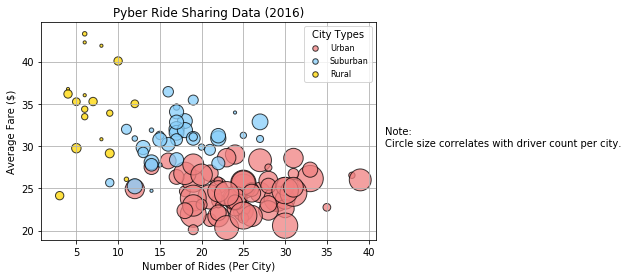

In [6]:
# Build the scatter plots for each city types
plt.scatter(urban_data["ride_count"], 
            urban_data["average_fare"], 
            s = urban_data["driver_count"]*10, 
            color = "lightcoral",
            edgecolor = "black",
            alpha = 0.75,
            label = "Urban")
plt.scatter(suburban_data["ride_count"], 
            suburban_data["average_fare"], 
            s = suburban_data["driver_count"]*10,
            color = "lightskyblue",
            edgecolor = "black",
            alpha = 0.75,
            label = "Suburban")
plt.scatter(rural_data["ride_count"], 
            rural_data["average_fare"], 
            s = rural_data["driver_count"]*10,
            color = "gold",
            edgecolor = "black",
            alpha = 0.75,
            label = "Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize = 8, title = "City Types", loc = 'best')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,30, "Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberRideSharingData2016scatter.png", bbox_inches = "tight")

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

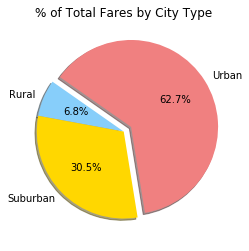

In [8]:
# Calculate Type Percents
type_group = combined_scuber_df.groupby(["type"])
total_fare = type_group["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["lightskyblue", "gold", "lightcoral"]
plt.pie(total_fare, 
        explode = explode, 
        labels = labels, 
        colors = colors, 
        autopct = "%2.1f%%", 
        shadow = True, 
        startangle = 145)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFaresByCityTypePie.png")

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

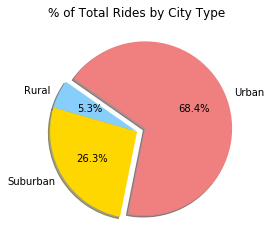

In [10]:
# Calculate Ride Percents
type_group = combined_scuber_df.groupby(["type"])
total_rides = type_group["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["lightskyblue", "gold", "lightcoral"]
plt.pie(total_rides, 
        explode = explode, 
        labels = labels, 
        colors = colors, 
        autopct = "%2.1f%%", 
        shadow = True, 
        startangle = 145)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesByCityTypePie.png")

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

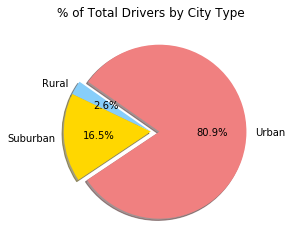

In [12]:
# Calculate Driver Percents
grouped_drivers = city_data.groupby(["type"])
total_drivers = grouped_drivers["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["lightskyblue", "gold", "lightcoral"]
plt.pie(total_drivers, 
        explode = explode, 
        labels = labels, 
        colors = colors, 
        autopct = "%2.1f%%", 
        shadow = True, 
        startangle = 145)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversByCityTypePie.png")

In [13]:
# Show Figure
plt.show()